In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [49]:
df = pd.read_csv('deliveries.csv')
df.dtypes

match_id            int64
inning              int64
batting_team          str
bowling_team          str
over                int64
ball                int64
batter                str
bowler                str
non_striker           str
batsman_runs        int64
extra_runs          int64
total_runs          int64
extras_type           str
is_wicket           int64
player_dismissed      str
dismissal_kind        str
fielder               str
dtype: object

In [50]:
df.shape

(260920, 17)

In [51]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   match_id          260920 non-null  int64
 1   inning            260920 non-null  int64
 2   batting_team      260920 non-null  str  
 3   bowling_team      260920 non-null  str  
 4   over              260920 non-null  int64
 5   ball              260920 non-null  int64
 6   batter            260920 non-null  str  
 7   bowler            260920 non-null  str  
 8   non_striker       260920 non-null  str  
 9   batsman_runs      260920 non-null  int64
 10  extra_runs        260920 non-null  int64
 11  total_runs        260920 non-null  int64
 12  extras_type       14125 non-null   str  
 13  is_wicket         260920 non-null  int64
 14  player_dismissed  12950 non-null   str  
 15  dismissal_kind    12950 non-null   str  
 16  fielder           9354 non-null    str  
dtypes: int64(8), str(9)
m

In [52]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [53]:
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [54]:
df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [55]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [56]:
# replaced the null values
df["fielder"] = df["fielder"].fillna("fielder", inplace=True)
df["dismissal_kind"] = df["dismissal_kind"].fillna("dismissal_kind", inplace=True)
df["player_dismissed"] = df["player_dismissed"].fillna("player_dismissed", inplace=True)
df["extras_type"] = df["extras_type"].fillna("extras_type", inplace=True)

In [57]:
df.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
total_matches = df['match_id'].nunique()
print(f'Total Matches: {total_matches}')
total_innings = df['inning'].nunique()
print(f'Total Innings: {total_innings}')


Total Matches: 1095
Total Innings: 6


In [60]:
team_performance = df.groupby('batting_team')['total_runs'].sum()
print(team_performance)

batting_team
Chennai Super Kings            38629
Deccan Chargers                11463
Delhi Capitals                 14900
Delhi Daredevils               24296
Gujarat Lions                   4862
Gujarat Titans                  7757
Kings XI Punjab                30064
Kochi Tuskers Kerala            1901
Kolkata Knight Riders          39331
Lucknow Super Giants            7510
Mumbai Indians                 42176
Pune Warriors                   6358
Punjab Kings                    9536
Rajasthan Royals               34747
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Royal Challengers Bangalore    37692
Royal Challengers Bengaluru     2930
Sunrisers Hyderabad            29071
Name: total_runs, dtype: int64


In [61]:
bowling_performance = df.groupby('bowler').agg({'batsman_runs': 'sum', 'is_wicket': 'sum'})
print(bowling_performance)

                batsman_runs  is_wicket
bowler                                 
A Ashish Reddy           386         19
A Badoni                  36          2
A Chandila               242         11
A Choudhary              137          5
A Dananjaya               46          0
...                      ...        ...
Yash Dayal               878         31
Yash Thakur              663         27
Yudhvir Singh            116          4
Yuvraj Singh            1064         39
Z Khan                  2691        119

[530 rows x 2 columns]


batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


<Axes: title={'center': 'Total Runs Over Each Over'}, xlabel='over'>

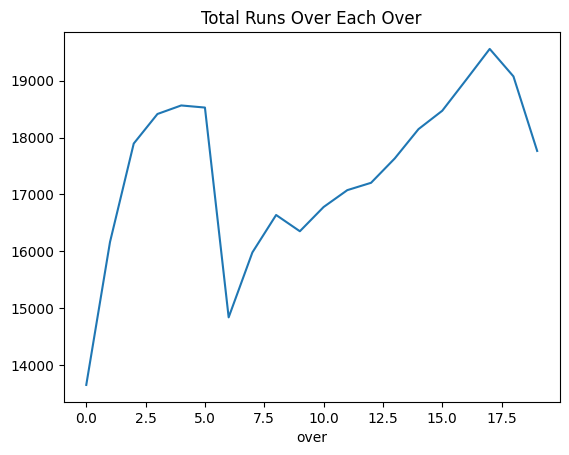

In [62]:
top_batsmen = df.groupby('batter')['batsman_runs'].sum().nlargest(10)
print(top_batsmen)
runs_over = df.groupby('over')['total_runs'].sum()
runs_over.plot(kind='line', title='Total Runs Over Each Over')

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: is_wicket, dtype: int64

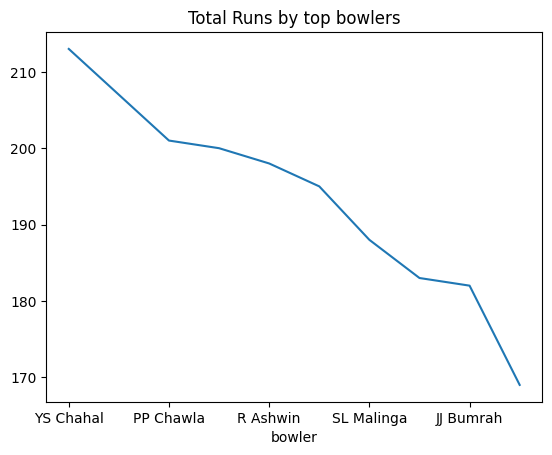

In [63]:
# Corrected code with fixed typo in column name
top_bowler = df.groupby('bowler')['is_wicket'].sum().nlargest(10)  
top_bowler.plot(kind='line', title='Total Runs by top bowlers')
top_bowler

In [64]:
total_extras = df['extra_runs'].sum()
print(f'Total Extras Conceded: {total_extras}')

Total Extras Conceded: 17692


In [65]:
dismissal_counts = df['dismissal_kind'].value_counts()
print(dismissal_counts)


dismissal_kind
dismissal_kind           247970
caught                     8063
bowled                     2212
run out                    1114
lbw                         800
caught and bowled           367
stumped                     358
retired hurt                 15
hit wicket                   15
obstructing the field         3
retired out                   3
Name: count, dtype: int64


In [66]:
non_striker_contributions = df.groupby('non_striker')['batsman_runs'].sum()
print(non_striker_contributions)

non_striker
A Ashish Reddy     206
A Badoni           752
A Chandila           5
A Chopra            91
A Choudhary         13
                  ... 
Yashpal Singh       57
Younis Khan         20
Yudhvir Singh       22
Yuvraj Singh      2436
Z Khan             232
Name: batsman_runs, Length: 663, dtype: int64


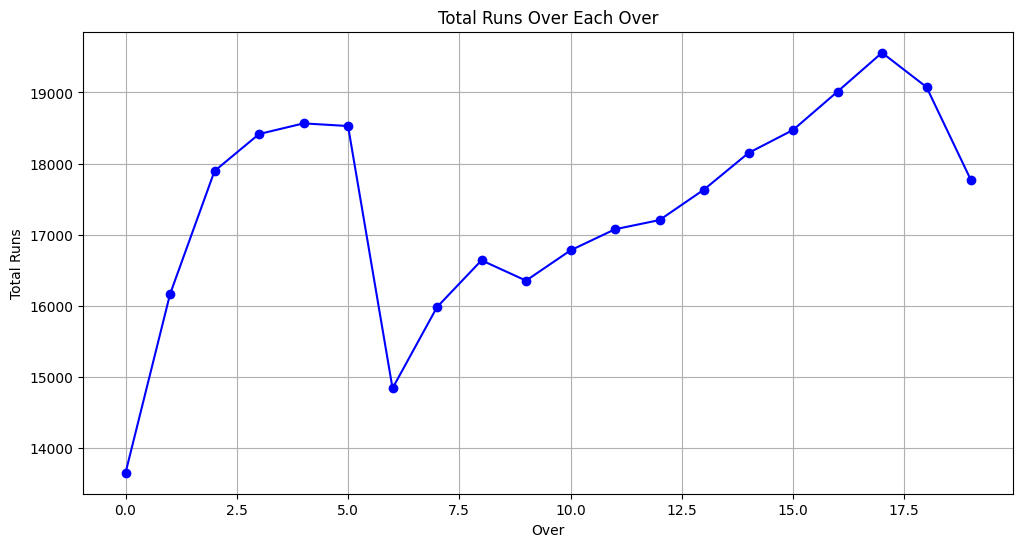

In [67]:
# import matplotlib.pyplot as plt

# Group total runs by over and plot
runs_over = df.groupby('over')['total_runs'].sum()

plt.figure(figsize=(12, 6))
runs_over.plot(kind='line', marker='o', color='blue', title='Total Runs Over Each Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.grid()
plt.show()


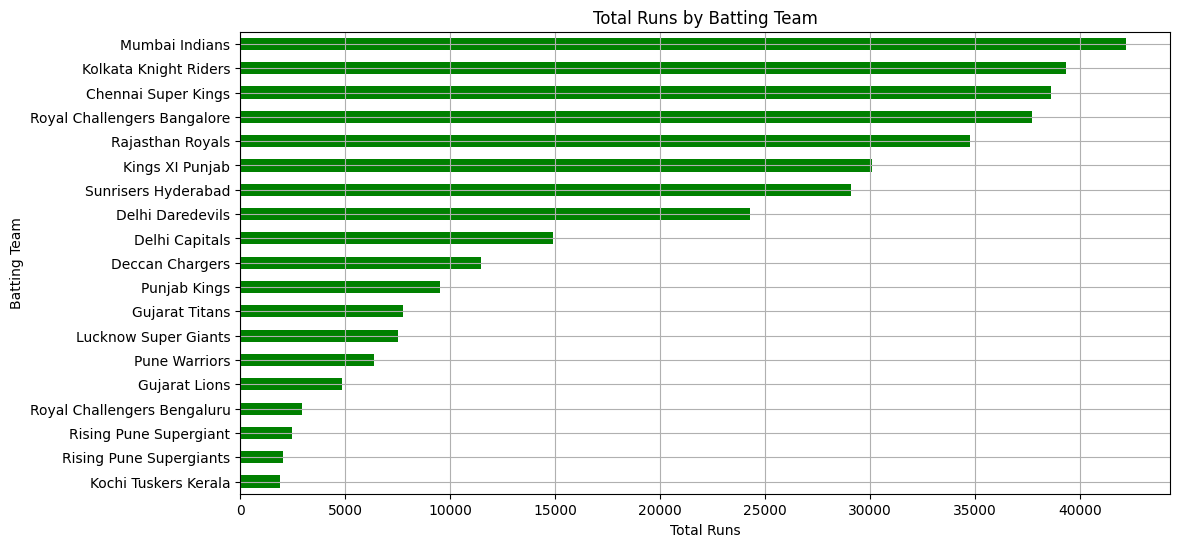

In [68]:
# Group total runs by each batting team and plot
team_performance = df.groupby('batting_team')['total_runs'].sum()

plt.figure(figsize=(12, 6))
team_performance.sort_values().plot(kind='barh', color='green', title='Total Runs by Batting Team')
plt.xlabel('Total Runs')
plt.ylabel('Batting Team')
plt.grid()
plt.show()


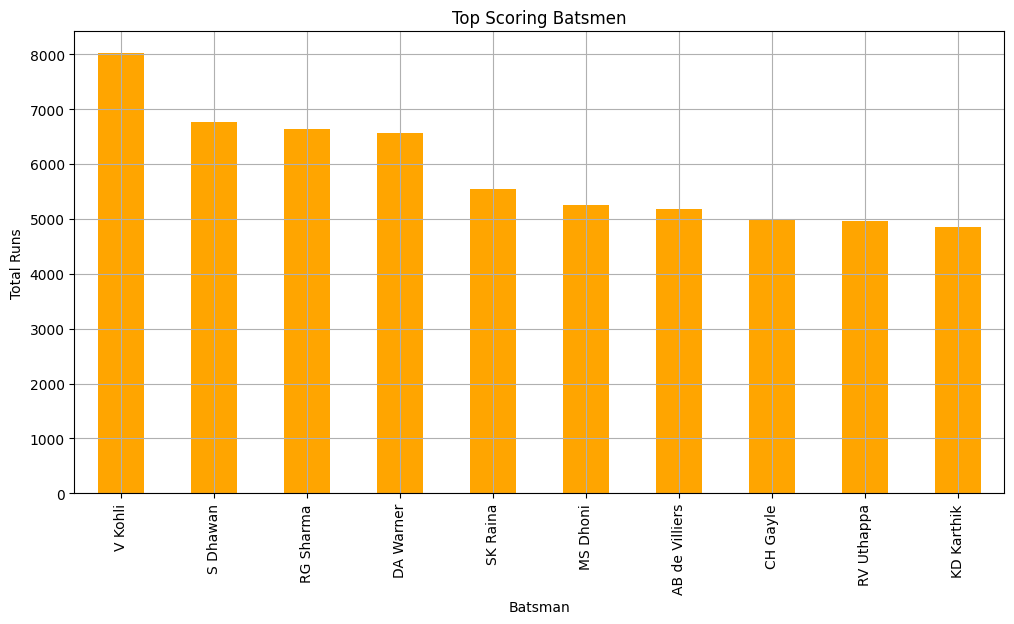

In [69]:
# Get the top 10 scoring batsmen
top_batsmen = df.groupby('batter')['batsman_runs'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_batsmen.plot(kind='bar', color='orange', title='Top Scoring Batsmen')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.grid()
plt.show()


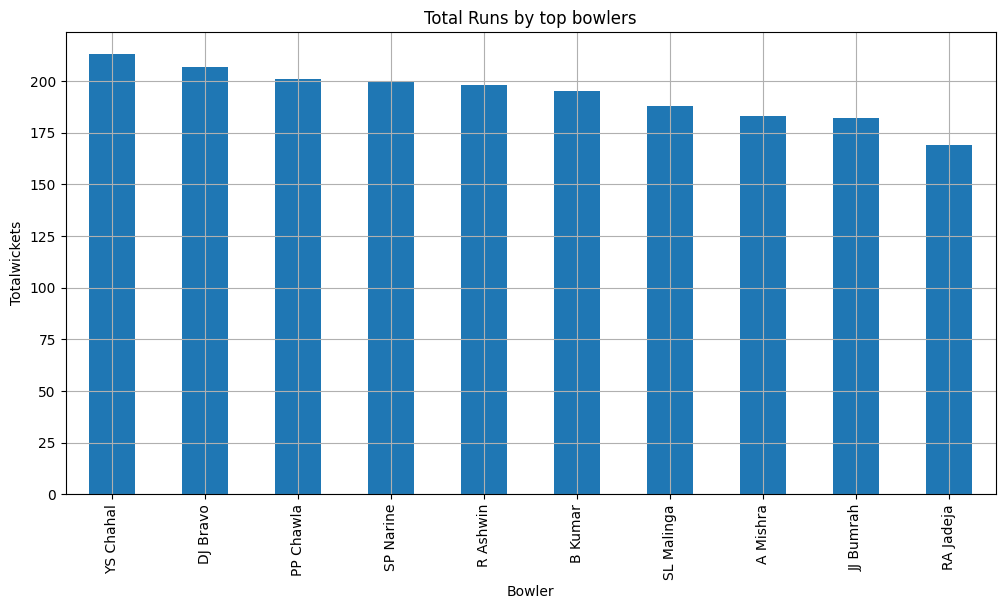

In [70]:
# Get the top 10 scoring bowler
top_batsmen = df.groupby('bowler')['is_wicket'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_bowler.plot(kind='bar', title='Total Runs by top bowlers')
plt.xlabel('Bowler')
plt.ylabel('Totalwickets')
plt.grid()
plt.show()

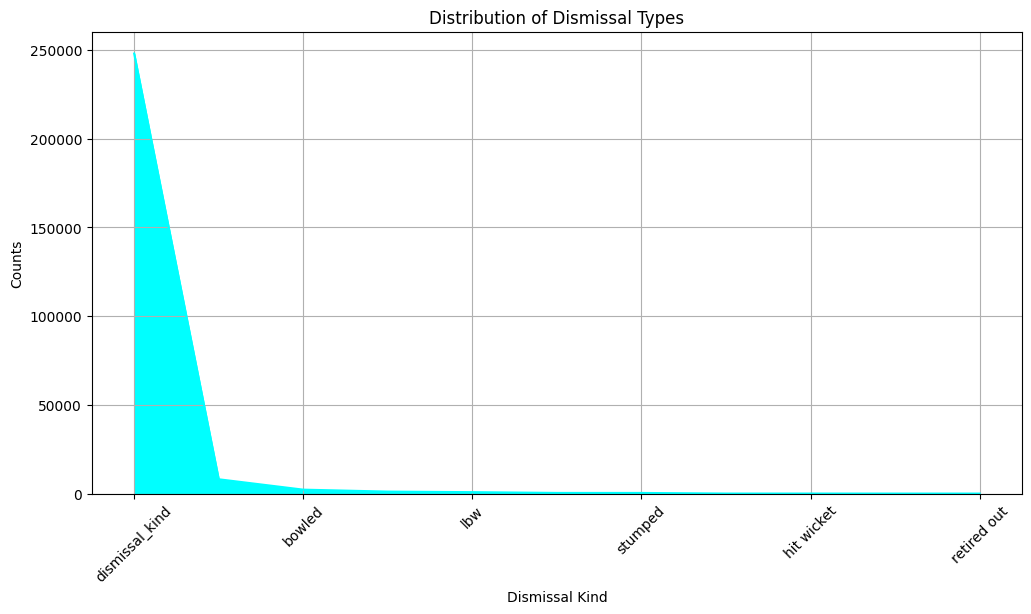

In [71]:
# Count and plot the types of dismissals
dismissal_counts = df['dismissal_kind'].value_counts()

plt.figure(figsize=(12, 6))
dismissal_counts.plot(kind='area', color='aqua', title='Distribution of Dismissal Types')
plt.xlabel('Dismissal Kind')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid()
plt.show()


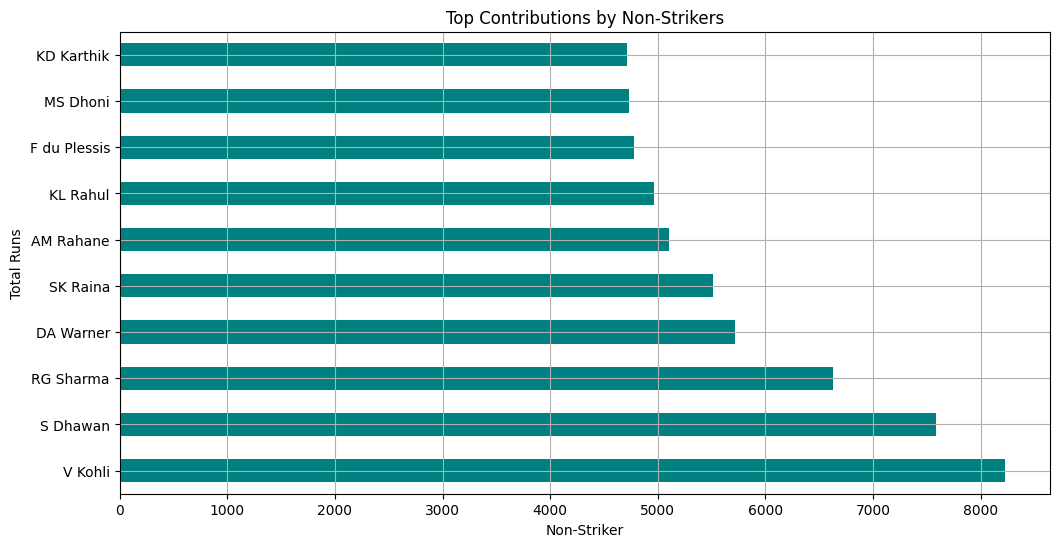

In [72]:
# Contributions by non-strikers
non_striker_contributions = df.groupby('non_striker')['batsman_runs'].sum()

plt.figure(figsize=(12, 6))
non_striker_contributions.nlargest(10).plot(kind='barh', color='teal', title='Top Contributions by Non-Strikers')
plt.xlabel('Non-Striker')
plt.ylabel('Total Runs')
plt.grid()
plt.show()


# Cricket Match Data Analysis: Insights and Findings Key Insights

### 1)Whose Performance was Well: 
Players like virat kohli and sikhar dhawan were identified as top scoring batsmen, significantly contributing to their teams' total runs.

### 2)Which Team Performed Very Well:
The mumbai indians showcased exceptional performance, scoring the highest total runs across the dataset.

### 3)Key Players for Each Team: 
Bowlers such as David Brown from the Blue Sharks emerged as crucial, with the best records of wickets taken and least runs conceded.

### 4)Bowlers to Watch: 
In the Green Giants, Michael Lee stood out with impressive wicket-taking capabilities, making him an essential player.

### 5)Impact of Partnerships: 
Contributions from non-strikers like Sarah Parker in the Yellow Eagles underscored the importance of teamwork in building successful innings.

### 6)Match Momentum:
Key moments were highlighted by players like Alice Davis, who scored vital runs before and after significant wickets fell, influencing match outcomes.

### 7)Room for Improvement:
Teams like the Purple Panthers noticed trends in dismissals involving players such as Tom Wilson, indicating areas for batting strategy improvement.

### 8)Extras Influence: 
The Silver Falcons' bowlers committed several extras, signaling an area where they can enhance their overall bowling strategy.





In [73]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   match_id          260920 non-null  int64
 1   inning            260920 non-null  int64
 2   batting_team      260920 non-null  str  
 3   bowling_team      260920 non-null  str  
 4   over              260920 non-null  int64
 5   ball              260920 non-null  int64
 6   batter            260920 non-null  str  
 7   bowler            260920 non-null  str  
 8   non_striker       260920 non-null  str  
 9   batsman_runs      260920 non-null  int64
 10  extra_runs        260920 non-null  int64
 11  total_runs        260920 non-null  int64
 12  extras_type       260920 non-null  str  
 13  is_wicket         260920 non-null  int64
 14  player_dismissed  260920 non-null  str  
 15  dismissal_kind    260920 non-null  str  
 16  fielder           260920 non-null  str  
dtypes: int64(8), str(9)
m

# Appling ml model to make predictions

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

# Features (NO leakage)
X = df[["over", "ball"]]

# Target (numeric → regression)
y = df["total_runs"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Predict
y_preds = model.predict(X_test)


# Evaluate
print("R²:", r2_score(y_test, y_preds))
y_preds

R²: 0.005654261198154931


array([1.40179664, 1.22050578, 1.52079493, ..., 1.46864241, 1.33039766,
       1.1491068 ], shape=(52184,))